In [ ]:
輸入檔案並檢查是否成功引入

In [88]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import random
fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.head()

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5
1,244784245612709_2051705218253927,244784245612709,陳學聖,政治人物,聖哥現在在FM91.7❤️\n各位好友，我們一起聽聽聖哥說什麼？,陳學聖,video,https://www.facebook.com/244784245612709/posts...,2019-01-15T04:07:24+0000,2019-01-15T12:07:24,...,POP Radio聯播網,【《Pop搶先爆》節目直播📽️】\n♦️主持人：資深媒體人 黃光芹\n♦️來賓：#立法委員 ...,152,0,0,0,0,0,1,1
2,244784245612709_2051583111599471,244784245612709,陳學聖,政治人物,【桃園客家局 慶功宴？泰國行一人八萬！ 】\n\n--------------\nhtt...,NaN,link,https://www.facebook.com/244784245612709/posts...,2019-01-15T02:05:12+0000,2019-01-15T10:05:12,...,桃園客家局泰國考察每人花8萬 一半團員竟非該局人員！ | 蘋果日報,桃園市客家事務局編例118萬7617元共15人，去年12月16日到21日，到泰國進行六天考察...,856,0,0,0,0,0,129,608
3,244784245612709_2050821571675625,244784245612709,陳學聖,政治人物,【FM91.7 POP radio】\n\n各位好友們，今天聖哥中午12:00在FM91.7...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T00:00:17+0000,2019-01-15T08:00:17,...,NaN,NaN,119,0,0,0,0,0,2,0
4,244784245612709_2050423788382070,244784245612709,陳學聖,政治人物,【桃園九歌民族管絃樂團】\n前往排練室為桃園 九歌民族管絃樂團 喝采！從我任文化局長開始，一...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-14T11:00:00+0000,2019-01-14T19:00:00,...,陳學聖貼文的相片,NaN,181,0,0,0,0,0,8,3


In [ ]:
選定洪慈庸為對象，讀入資料

In [89]:
tzu_yung = fb[fb.page_name == "洪慈庸"]
tzu_yung.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
10309,852926604746233_2093981063974108,852926604746233,洪慈庸,公眾人物,還有一天，「薯意后里 百合齊放」就在后里！\n\n馬鈴薯是后里的重要農作物之一，每年定期舉辦...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-01-13T04:15:05+0000,2019-01-13T12:15:05,...,洪慈庸貼文的相片,NaN,324,0,0,0,0,0,12,3


In [90]:
tzu_yung['new_date'] = pd.to_datetime(tzu_yung['created_time_taipei']).dt.date
tzu_yung['month_year'] = pd.to_datetime(tzu_yung['new_date']).dt.to_period('M')
results = tzu_yung.groupby('month_year').sum()
results.index.name = 'YYYY-MM'
results.reset_index(inplace=True)
results
tzu_yung

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
10309,852926604746233_2093981063974108,852926604746233,洪慈庸,公眾人物,還有一天，「薯意后里 百合齊放」就在后里！\n\n馬鈴薯是后里的重要農作物之一，每年定期舉辦...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-01-13T04:15:05+0000,2019-01-13T12:15:05,...,324,0,0,0,0,0,12,3,2019-01-13,2019-01
10310,852926604746233_2092985460740335,852926604746233,洪慈庸,公眾人物,吞嚥功能會隨著年齡老化而變差，長輩最怕的就是吃東西咬不動，但「#均衡飲食」才是健康的首要原則...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-01-12T12:26:00+0000,2019-01-12T20:26:00,...,354,0,0,0,0,0,9,4,2019-01-12,2019-01
10311,852926604746233_2091479710890910,852926604746233,洪慈庸,公眾人物,近日世新大學社會發展研究所遭校務會議強行決議停招，整體決議過程令人質疑且欠缺與師生充分的溝通...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-01-11T09:58:00+0000,2019-01-11T17:58:00,...,339,0,0,0,0,0,9,7,2019-01-11,2019-01
10312,852926604746233_2090158017689746,852926604746233,洪慈庸,公眾人物,108年度總預算剛剛正式審查完竣，雖然會期劃下了句點，但是慈庸監督部會的腳步不會停下。\n ...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-01-10T11:19:49+0000,2019-01-10T19:19:49,...,444,0,0,0,0,0,16,3,2019-01-10,2019-01
10313,852926604746233_2087651337940414,852926604746233,洪慈庸,公眾人物,年度預算審查持續進行中！\n\n今晚原能會的預算案，慈庸辦公室特別針對「游離輻射安全防護」的...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-01-08T15:22:36+0000,2019-01-08T23:22:36,...,368,0,0,0,0,0,12,4,2019-01-08,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,852926604746233_1761826330615034,852926604746233,洪慈庸,公眾人物,【LIVE｜慈庸＋ 賴清德 大雅車隊出發】\n \n🔸倒數15天衝刺！賴清德副總統候選人現在...,洪慈庸的直播影片。,video,https://www.facebook.com/hjjtaiwan/videos/1761...,2019-12-27T06:36:48+0000,2019-12-27T14:36:48,...,4507,0,0,0,0,0,411,105,2019-12-27,2019-12
10832,852926604746233_740097446476088,852926604746233,洪慈庸,公眾人物,【LIVE｜慈庸 + 林飛帆 大雅掃街中！】\n\n大家午安！感謝飛帆再次來相挺慈庸！我們正...,洪慈庸的直播影片。,video,https://www.facebook.com/hjjtaiwan/videos/7400...,2019-12-27T04:16:19+0000,2019-12-27T12:16:19,...,4642,0,0,0,0,0,255,97,2019-12-27,2019-12
10833,852926604746233_2705260962846112,852926604746233,洪慈庸,公眾人物,我只是在撥瀏海...不是在擺pose...🤣\n \n早上在潭子車站前收到很多暖心的問候和熱...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-12-27T01:50:09+0000,2019-12-27T09:50:09,...,6704,0,0,0,0,0,121,29,2019-12-27,2019-12
10834,852926604746233_2465206493602460,852926604746233,洪慈庸,公眾人物,【LIVE｜慈庸正在潭子車站前！】\n \n敖早！倒數15天，慈庸和咱在地 台中市議員蕭隆澤...,洪慈庸的直播影片。,video,https://www.facebook.com/hjjtaiwan/videos/2465...,2019-12-26T23:06:41+0000,2019-12-27T07:06:41,...,5306,0,0,0,0,0,355,55,2019-12-27,2019-12


In [ ]:
畫出 like-share 散布圖
並加上趨勢線

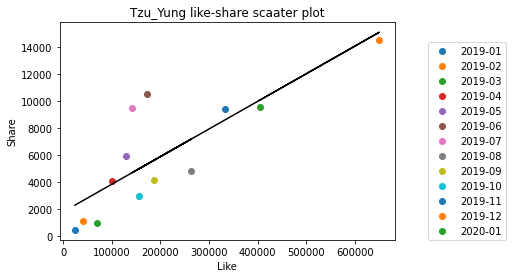

In [91]:
import matplotlib.pyplot as plt
import numpy
for aa in range(0,len(results)):
    plt.scatter(results.loc[aa,['like_count']],results.loc[aa,['share_count']])
plt.legend(results['YYYY-MM'],loc = [1.1,0])
plt.title("Tzu_Yung like-share scaater plot")
plt.xlabel("Like")
plt.ylabel("Share")

z = numpy.polyfit(results['like_count'], results['share_count'] , 1)
p = numpy.poly1d(z)
plt.plot(results['like_count'],p(results['like_count']),'black')

In [ ]:
發現6月份 Like-Share比例最離群
來看看花生什麼

In [92]:
tzu6 = tzu_yung[tzu_yung.month_year == '2019-06']
result6 = tzu6.groupby('new_date').sum()
result6.index.name = 'Year_Month'
result6.reset_index(inplace = True)
result6

,Year_Month,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-06-02,852926604746233,5447,0,0,0,0,0,401,150
1,2019-06-03,1705853209492466,3350,0,0,0,0,0,100,93
2,2019-06-04,1705853209492466,6009,0,0,0,0,0,354,679
3,2019-06-05,1705853209492466,6832,0,0,0,0,0,504,163
4,2019-06-07,852926604746233,2278,0,0,0,0,0,96,55
5,2019-06-08,852926604746233,2110,0,0,0,0,0,62,92
6,2019-06-10,2558779814238699,13362,0,0,0,0,0,463,657
7,2019-06-11,1705853209492466,4756,0,0,0,0,0,135,19
8,2019-06-12,3411706418984932,16703,0,0,0,0,0,950,789
9,2019-06-13,852926604746233,3254,0,0,0,0,0,100,155


In [ ]:
這邊一樣使用散布圖來看一下6月的 Like-Share 分布

Text(0, 0.5, 'Share')

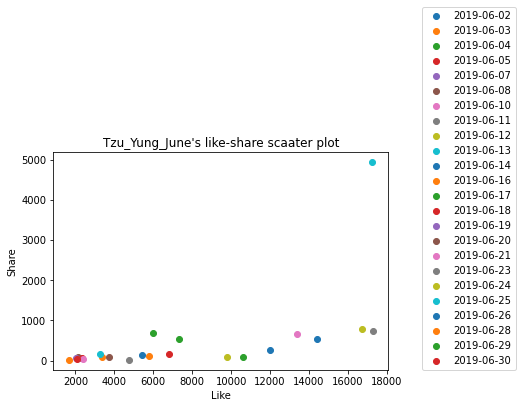

In [93]:
for bb in range(0,len(result6)):
    plt.scatter(result6.loc[bb,['like_count']],result6.loc[bb,['share_count']])
plt.legend(result6['Year_Month'],loc = [1.1,0])
plt.title("Tzu_Yung_June's like-share scaater plot")
plt.xlabel("Like")
plt.ylabel("Share")

In [ ]:
好像只有6月25的點比較突出
另外23、24的貼文讚數很多，可是分享很低，等等可以看一下
下面先畫成折線圖好了

Text(0.5, 1.0, 'June_Like-Share')

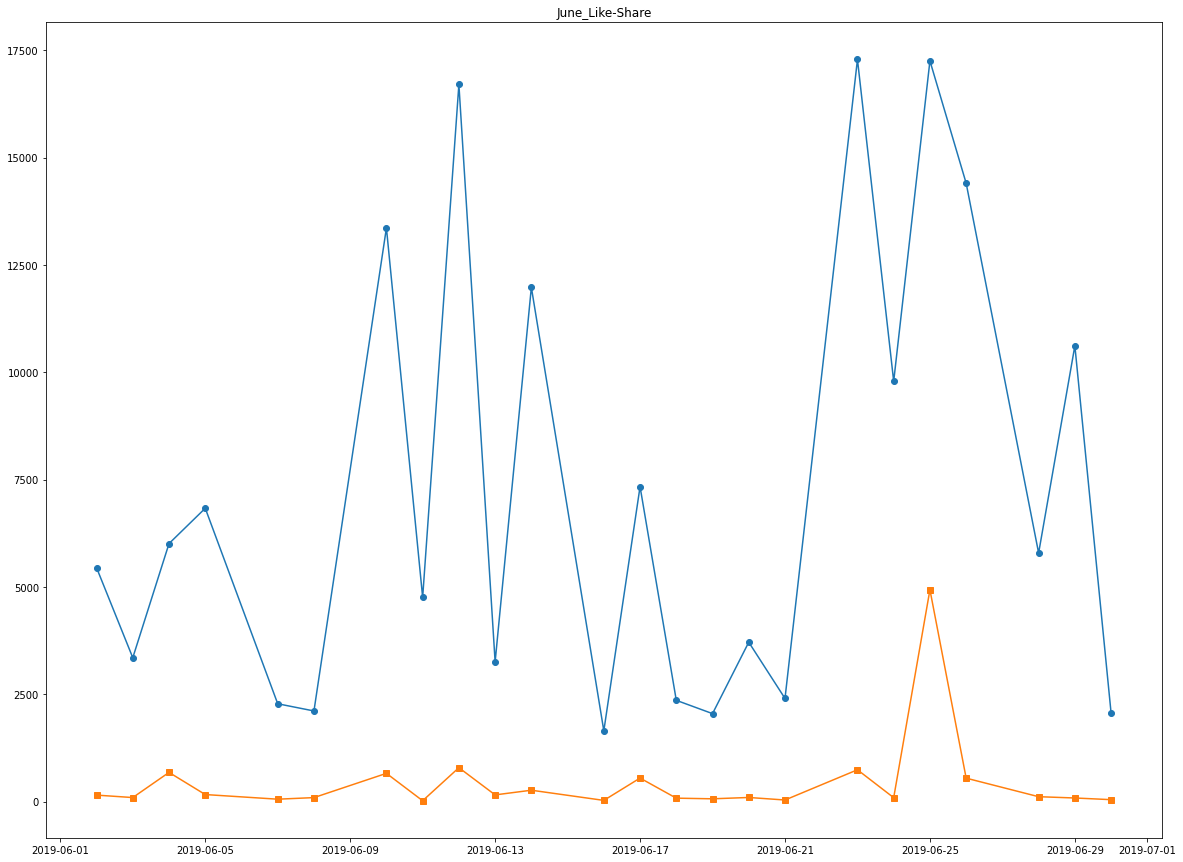

In [94]:
plt.figure(figsize = (20,15))
labels = [str(i) for i in range(1,32)]
plt.plot(result6['Year_Month'],result6['like_count'],'o-')
plt.plot(result6['Year_Month'],result6['share_count'],'s-')
plt.title("June_Like-Share")

In [ ]:
可以看到，在23號的貼文和25號獲得的讚數差不多，但分享量卻差很多
來看看貼文好了

In [110]:
tzu_yung['new_date'] = tzu_yung['new_date'].map(str)
lo_share = tzu_yung[tzu_yung['new_date'] == "2019-06-23"]
hi_share = tzu_yung[tzu_yung['new_date'] == "2019-06-25"]
lo_share

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
10464,852926604746233_2343006362404909,852926604746233,洪慈庸,公眾人物,保持警覺，別在最後一刻功虧一簣。\n \n再一週台灣就要告別口蹄疫疫區，台灣豬肉將能重啟外銷...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-06-23T13:05:44+0000,2019-06-23T21:05:44,...,7521,0,0,0,0,0,76,672,2019-06-23,2019-06
10465,852926604746233_2342538239118388,852926604746233,洪慈庸,公眾人物,守護民主，風雨同路。\n\n623我們一同站上凱道，拒絕任何擁有發話權卻不斷為中共代言的代理...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-06-23T07:02:33+0000,2019-06-23T15:02:33,...,9765,0,0,0,0,0,137,68,2019-06-23,2019-06


In [ ]:
gg = lo_share.loc[10465,['permalink']]
gg[0]

6/23獲得將近1萬讚，卻只有68次分享的貼文，是當時反紅媒的貼文

In [111]:
hi_share

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
10459,852926604746233_2346663238705888,852926604746233,洪慈庸,公眾人物,一條不存在的幽靈航線\n一艘有過走私紀錄的船\n和一間已經解散的公司\n \n再魔幻一點，我...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-06-25T13:22:47+0000,2019-06-25T21:22:47,...,2912,0,0,0,0,0,133,77,2019-06-25,2019-06
10460,852926604746233_2346247232080822,852926604746233,洪慈庸,公眾人物,這像話嗎？高雄自己搞小三通，宣佈「旗津溫州」首航，還扯上走私貨船？\n \n高雄辦了場「高雄...,NaN,photo,https://www.facebook.com/852926604746233/posts...,2019-06-25T08:03:38+0000,2019-06-25T16:03:38,...,14342,0,0,0,0,0,1476,4857,2019-06-25,2019-06


In [114]:
hh1 = hi_share.loc[10460,['permalink']]
hh2 = hi_share.loc[10459,['permalink']]

hh2[0]

'https://www.facebook.com/852926604746233/posts/2346663238705888/'

6/25獲得接近1.5萬讚及4.7K分享數的貼文，則是在抨擊當時高雄市疑似自己搞小三通的事件
至於同天稍晚的發文，就沒有獲得那麼多讚以及分享；推測可能是稍早的發文已經有講述同樣的事件
也有可能是第一篇發文的開頭更加聳動